In [29]:
import pandas_datareader as web
web.__version__ 

'0.10.0'

In [30]:
import yfinance as yf

#指定一下获取股票数据的起始日期和截止日期
#这里就用2020年1月1日至3月18日的数据
start_date = '2024-05-01'
end_date = '2024-08-14'
#创建数据表，这里选择下载的股票代码为601318
#数据源设置为yahoo
#并把我们把设定的开始日期和截止日期作为参数传入
data = yf.download('00878.TW',start_date,end_date)
#下面来检查一下数据表的前5行
data.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-05-02,22.250000,22.360001,22.129999,22.219999,21.739210,129879245
2024-05-03,22.500000,22.500000,22.290001,22.299999,21.817478,63184164
2024-05-06,22.580000,22.680000,22.469999,22.629999,22.140339,67089486
2024-05-07,22.790001,22.820000,22.590000,22.760000,22.267527,94260122
2024-05-08,22.760000,22.900000,22.760000,22.889999,22.394712,66133413


In [31]:
data['diff'] = data['Close'].diff()
data.head()

,Open,High,Low,Close,Adj Close,Volume,diff
Date,,,,,,,
2024-05-02,22.250000,22.360001,22.129999,22.219999,21.739210,129879245,NaN
2024-05-03,22.500000,22.500000,22.290001,22.299999,21.817478,63184164,0.080000
2024-05-06,22.580000,22.680000,22.469999,22.629999,22.140339,67089486,0.330000
2024-05-07,22.790001,22.820000,22.590000,22.760000,22.267527,94260122,0.130001
2024-05-08,22.760000,22.900000,22.760000,22.889999,22.394712,66133413,0.129999


In [32]:
import numpy as np
#创建交易信号字段，命名为Signal
#如果diff值大于0，则Signal为1，否则为0
data['Signal'] = np.where(data['diff'] > 0, 1, 0)
data.head()

,Open,High,Low,Close,Adj Close,Volume,diff,Signal
Date,,,,,,,,
2024-05-02,22.250000,22.360001,22.129999,22.219999,21.739210,129879245,NaN,0
2024-05-03,22.500000,22.500000,22.290001,22.299999,21.817478,63184164,0.080000,1
2024-05-06,22.580000,22.680000,22.469999,22.629999,22.140339,67089486,0.330000,1
2024-05-07,22.790001,22.820000,22.590000,22.760000,22.267527,94260122,0.130001,1
2024-05-08,22.760000,22.900000,22.760000,22.889999,22.394712,66133413,0.129999,1


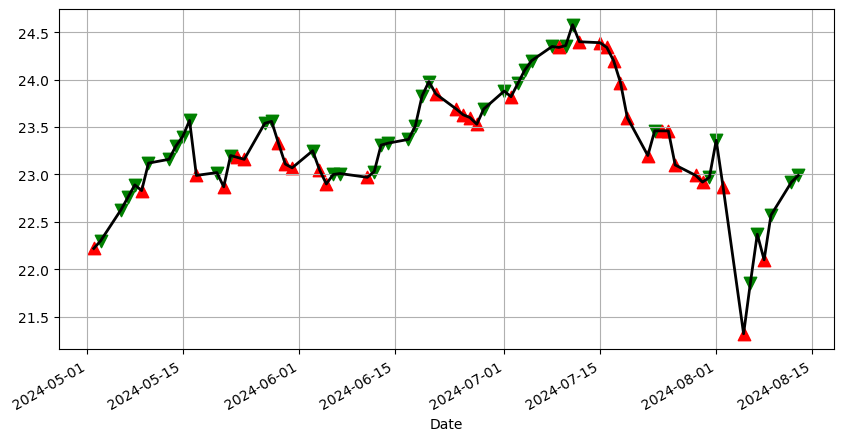

In [33]:
#导入画图工具matplotlib
import matplotlib.pyplot as plt
#设置画布的尺寸为10*5
plt.figure(figsize = (10,5))
#使用折线图绘制出每天的收盘价
data['Close'].plot(linewidth=2, color='k', grid = True)
#如果当天股价上涨，标出卖出信号，用倒三角表示
plt.scatter(data['Close'].loc[data.Signal==1].index,
        data['Close'][data.Signal==1],
        marker = 'v', s=80, c='g')
#如果当天股价下跌给出买入信号，用正三角表示
plt.scatter(data['Close'].loc[data.Signal==0].index,
        data['Close'][data.Signal==0],
        marker = '^', s=80, c='r')
plt.show()